In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(engine, reflect=True)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
measurement=Base.classes.measurement
station=Base.classes.station


In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)
measurement1 = session.query(measurement).first()
measurement1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29da5acc970>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'station': 'USC00519397',
 'id': 1,
 'tobs': 65.0}

In [9]:
station1 = session.query(station).first()
station1.__dict__

{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x29da5ada0a0>,
 'longitude': -157.8168,
 'name': 'WAIKIKI 717.2, HI US',
 'id': 1,
 'elevation': 3.0,
 'latitude': 21.2716,
 'station': 'USC00519397'}

# Exploratory Precipitation Analysis

In [10]:
# Find the most recent date in the data set.
recent_date = session.query(func.max(measurement.date)).first()
recent_date
#recent_date = dt.datetime.strptime(recent_date, '%Y-%m-%d')


('2017-08-23')

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 


# Calculate the date one year from the last date in data set.
year_ago = dt.date(2017,8,23) - dt.timedelta(days=365)

# Perform a query to retrieve the data and precipitation scores
twelve_months = session.query(measurement).filter(measurement.date > year_ago).statement
measurement_df = pd.read_sql_query(twelve_months, session.bind)
# Save the query results as a Pandas DataFrame and set the index to the date column
measurement_df.set_index('date')

# Sort the dataframe by date
measurement_df.sort_values(by=["date"])


,id,station,date,prcp,tobs
0,2365,USC00519397,2016-08-24,0.08,79.0
1006,8826,USC00517948,2016-08-24,NaN,78.0
1524,14609,USC00519281,2016-08-24,2.15,77.0
702,7332,USC00514830,2016-08-24,2.28,80.0
360,5092,USC00513117,2016-08-24,2.15,76.0
...,...,...,...,...,...
1522,12186,USC00519523,2017-08-22,0.00,82.0
1523,12187,USC00519523,2017-08-23,0.08,82.0
359,2724,USC00519397,2017-08-23,0.00,81.0
1005,7635,USC00514830,2017-08-23,0.00,82.0


[]

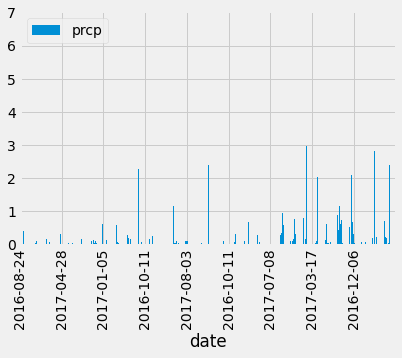

In [12]:
# Use Pandas Plotting with Matplotlib to plot the data
ax = measurement_df.plot.bar(x = "date", y = "prcp")
ax.locator_params(nbins=9, axis='x')
ax.plot(figsize=(30, 10))

In [14]:
# Use Pandas to calcualte the summary statistics for the precipitation data
measurement_df[["prcp"]].describe()

,prcp
count,2015.000000
mean,0.176462
std,0.460288
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [15]:
# Design a query to calculate the total number stations in the dataset
stationcount = session.query(func.count(station.id)).all()
stationcount

[(9)]

In [16]:
station_list = []
new_stations = session.query(func.distinct(station.station)).all()
for x in new_stations:
    station_list.append(x)
station_list

[('USC00519397'),
 ('USC00513117'),
 ('USC00514830'),
 ('USC00517948'),
 ('USC00518838'),
 ('USC00519523'),
 ('USC00519281'),
 ('USC00511918'),
 ('USC00516128')]

In [32]:
# Design a query to find the most active stations (i.e. what stations have the most rows?)
# List the stations and the counts in descending order.

all_stations = session.query(func.count(measurement.station), measurement.station).group_by(measurement.station).order_by(func.count(measurement.station).desc()).all()
all_stations
#swag = session.query(func.count(measurement.station), measurement.station).group_by

[(2772, 'USC00519281'),
 (2724, 'USC00519397'),
 (2709, 'USC00513117'),
 (2669, 'USC00519523'),
 (2612, 'USC00516128'),
 (2202, 'USC00514830'),
 (1979, 'USC00511918'),
 (1372, 'USC00517948'),
 (511, 'USC00518838')]

In [33]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
lowest = session.query(func.min(measurement.tobs)).filter(measurement.station == "USC00519281").all()
highest = session.query(func.max(measurement.tobs)).filter(measurement.station == "USC00519281").all()
avg = session.query(func.avg(measurement.tobs)).filter(measurement.station == "USC00519281").all()
print(lowest, highest, avg)

[(54.0,)] [(85.0,)] [(71.66378066378067,)]


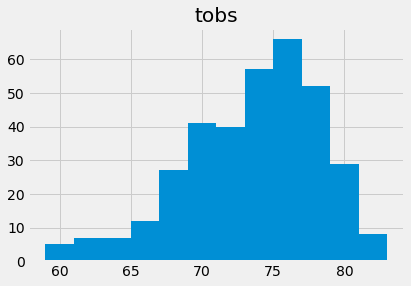

In [34]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
twelve_months2 = session.query(measurement).filter(measurement.date > year_ago).filter(measurement.station == "USC00519281").statement
stations_df = pd.read_sql_query(twelve_months2, session.bind)
stations_df
ax2 = stations_df.hist("tobs", bins = 12)
#plt.show()

# Close session

In [35]:
# Close Session
session.close()